<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/%C4%B0thalat_ve_%C4%B0hracat_Dengesi_Analizi_(Zamana_Ba%C4%9Fl%C4%B1_Seri).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def dis_ticaret_verisi_olustur():
    # Yıllar ve Milyar Dolar cinsinden simüle edilmiş veriler
    yillar = [2018, 2019, 2020, 2021, 2022, 2023]
    ihracat_milyar = [175, 181, 170, 225, 254, 256]
    ithalat_milyar = [224, 210, 219, 271, 364, 362]

    veri = {
        'Yıl': yillar,
        'İhracat (Milyar $)': ihracat_milyar,
        'İthalat (Milyar $)': ithalat_milyar
    }

    df = pd.DataFrame(veri)
    df = df.set_index('Yıl')
    return df

In [2]:
def denge_hesapla_ve_analiz_et(df):

    # Yeni Sütun Oluşturma: Pandas'ta sütunlar arası çıkarma işlemi (Vektörizasyon)
    df['Ticaret_Dengesi'] = df['İhracat (Milyar $)'] - df['İthalat (Milyar $)']

    print("\n--- Ticaret Dengesi Tablosu ---")
    print(df[['İhracat (Milyar $)', 'İthalat (Milyar $)', 'Ticaret_Dengesi']])

    # En kötü ve en iyi yıl tespiti
    en_kötü_yil = df['Ticaret_Dengesi'].idxmin()
    en_iyi_yil = df['Ticaret_Dengesi'].idxmax()

    print(f"\nEn Düşük Ticaret Dengesi Yılı (En Fazla Açık): {en_kötü_yil} ({-df.loc[en_kötü_yil, 'Ticaret_Dengesi']:.2f} Milyar $ Açık)")
    print(f"En Yüksek Ticaret Dengesi Yılı (En Az Açık/En Fazla Fazla): {en_iyi_yil} ({-df.loc[en_iyi_yil, 'Ticaret_Dengesi']:.2f} Milyar $ Açık)")

    return df

In [3]:
def denge_grafik_ciz(df):

    plt.figure(figsize=(10, 6))

    # Çubuk Grafik (Bar Plot) ile Dengeyi Gösterme
    # Denge pozitifse yeşil, negatifse kırmızı renk ataması
    renkler = ['green' if x > 0 else 'red' for x in df['Ticaret_Dengesi']]

    plt.bar(df.index.astype(str), df['Ticaret_Dengesi'], color=renkler)

    plt.axhline(0, color='black', linestyle='-') # Sıfır çizgisini ekler
    plt.title("Yıllara Göre Ticaret Dengesi (İhracat - İthalat)", fontsize=14)
    plt.xlabel("Yıl")
    plt.ylabel("Ticaret Dengesi (Milyar $)")
    plt.grid(axis='y', linestyle='--')
    plt.xticks(df.index.astype(str)) # X ekseninde yılların tam görünmesini sağlar

    plt.show()

--- Proje 1: Dış Ticaret Dengesi Analizi Başladı ---

--- Ticaret Dengesi Tablosu ---
      İhracat (Milyar $)  İthalat (Milyar $)  Ticaret_Dengesi
Yıl                                                          
2018                 175                 224              -49
2019                 181                 210              -29
2020                 170                 219              -49
2021                 225                 271              -46
2022                 254                 364             -110
2023                 256                 362             -106

En Düşük Ticaret Dengesi Yılı (En Fazla Açık): 2022 (110.00 Milyar $ Açık)
En Yüksek Ticaret Dengesi Yılı (En Az Açık/En Fazla Fazla): 2019 (29.00 Milyar $ Açık)


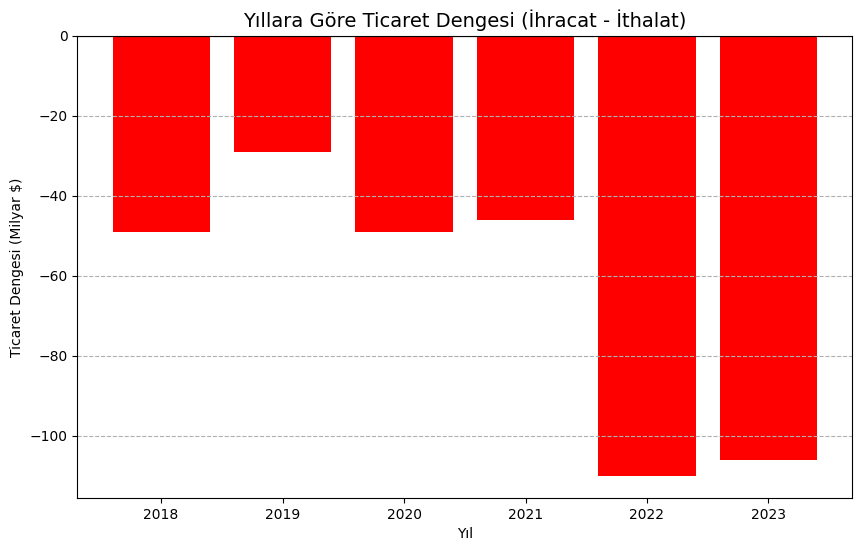

In [4]:
print("--- Proje 1: Dış Ticaret Dengesi Analizi Başladı ---")
veri_df = dis_ticaret_verisi_olustur()
analiz_df = denge_hesapla_ve_analiz_et(veri_df)
denge_grafik_ciz(analiz_df)